<a href="https://colab.research.google.com/github/gnidetsanna/python_for_ML_tasks/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_hnidets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
medical_df = pd.read_csv('/content/drive/MyDrive/Homeworks/medical-charges.csv')


###Завдання 1:###

Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###Відповідь Завдання 1###



1.   Знайти з яким стовпчиком найбільше корелює значення charges, щоб прослідкувати від чого найбільше залежить величина charges, побудувати візуалізацію
2.  Відкинути -+3сігма значення і Провести аналіз попарно усіх колонок з charges
3.  Провести аналіз трьох колонок однією з яких буде charges.




###Завдання 2:###


```
# This is formatted as code
```

 Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [6]:
!pip install plotly matplotlib seaborn --quiet

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [8]:
medical_df.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [9]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

###Висновок 2.1###
Розподіл по статі в наборі даних майже рівномірний, тобто не має певної залежності яка стать звертається за медичним страхуванням частіше

Бачимо що в категорії більше 30К долларів медичні витрати в нашій вибірці більше беруть чоловіки, для жінок
Загалом третій квартиль у чоловіків більший ніж у жінок, але кореляція між статтю і медичними витратами дуже мала.
В цілому у жінок є більше підстав для збільшення платежів в зв'язку з підготовкою і вагітністю, можливо зі змінні треба аналізувати разом з показником наявності дітей.

In [ ]:
medical_df.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey','yellow','pink'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

###Висновок 2.2###
Розподіл по регіонам плюс мінус рівномірний, найбільше в вибірці клієнтів із регіону southeast.
В категорії більше 30К поступово пропадають мешканці південних регіонів, Найбільші платежі у жителів північних регіонів.

###Завдання 3:###
 Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [10]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

###Висновок 3.1###
Найбільше серед курців мешканців південно-східного регіону.
В цілому по всім регіонам спостерігається однаковий розподіл обох категорій курців і не курців.

In [11]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker')

###Висновок 3.1###
Спостерігаємо, що серед курців виділяються клієнти, в яких немає дітей. А ті, в кого 5 дітей взагалі не курять)
Бачимо, що розподіл плюс мінус однаковий в обох категоріях клієнтів.


###Завдання 4:###
 Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [12]:
px.violin(medical_df, x='charges', color='children', title='Charges when Children')

###Висновок 4.1###
Найбільша густина розподілу серед людей, в яких 5 дітей - вони завичай платять по страховці в межах 6-7к і сторо до 24к.
Найдовша і плюс мінус семитричний розподіл по всьому діапазону платежів в клієнтів, які не мають дітей.
Найбільше даних в категорії платежів до 10к.

In [ ]:
px.violin(medical_df, x='charges',y = 'sex', color='children', title='Charges when Children')

###Висновок завдання 4.2###
Також бачимо як у чоловіків з 5 дітьми більше густина розподілу в в межах до 10к платежів, в той час як в жінок з 5 дітьми графік більш семитричних і платежі в межах 0-25к.

###Завдання 5:###
 Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [13]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [14]:
def estimate_charges(age, w, b):
    return w * age + b

In [15]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

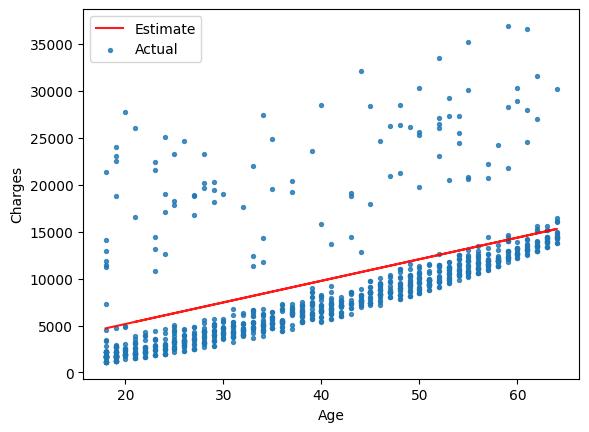

In [16]:
 try_parameters(non_smoker_df,230,560)

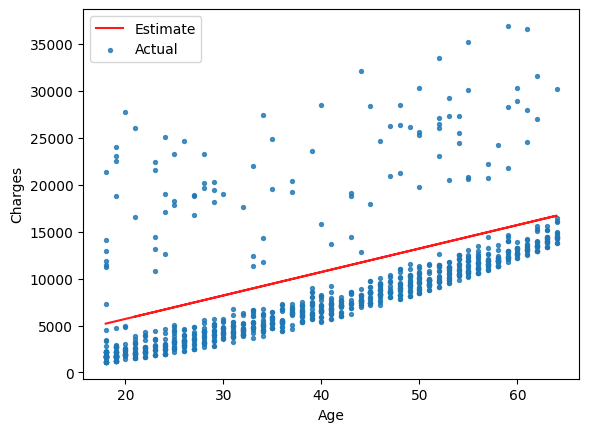

In [17]:
try_parameters(non_smoker_df,250,700)

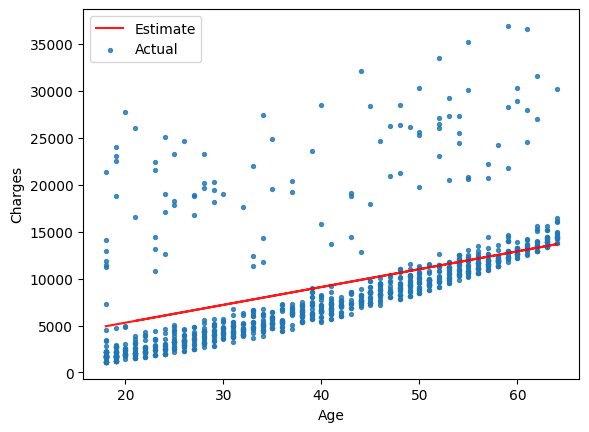

In [18]:
try_parameters(non_smoker_df,190,1500)

In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###Висновок завдання 5###
Напевно найкраще графік опише лінія, що проходить по верху найбільшої густини розподілу даних , щоб врахувати викиди.
Більш менш можна прикинути що w повинно бути більше ніж b .
Найкраще на мою думку 250, 700 тобто 1/3.

###Завдання 6:###
 Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [19]:
import numpy as np

In [20]:
def rmse(targets,series, w, b):
    predicted = estimate_charges(series, w, b)
    return np.sqrt(np.mean(np.square(targets - predicted)))

In [21]:
targets = non_smoker_df['charges']

rmse(targets,non_smoker_df.age,250,700)

5124.32828785501

In [22]:
rmse(targets,non_smoker_df.age,230,560)

4839.0707084765045

In [23]:
for i in range(100,400,10):
  for y in range(100,5000,100):
   f = rmse(targets,non_smoker_df.age,i,y)
   if f < 4750:
     print(f'{f=},{i=},{y=}')

f=4732.062657000804,i=210,y=100
f=4731.780588820299,i=210,y=200
f=4733.611527332133,i=210,y=300
f=4737.553022673913,i=210,y=400
f=4743.5998138124805,i=210,y=500
f=4721.288985595375,i=220,y=100
f=4729.341488320653,i=220,y=200
f=4739.490704790739,i=220,y=300
f=4747.482971183577,i=230,y=100


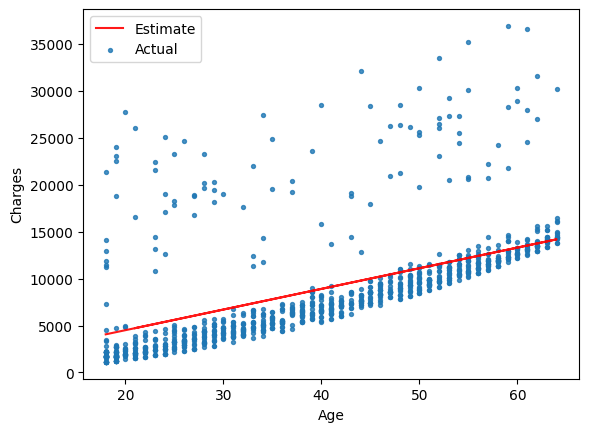

In [24]:
try_parameters(non_smoker_df,220,100)

In [25]:
for i in range(210,230,1):
  for y in range(100,1000,10):
   f = rmse(targets,non_smoker_df.age,i,y)
   if f < 4721:
     print(f'{f=},{i=},{y=}')

f=4720.634205044914,i=217,y=100
f=4720.481900391483,i=218,y=100
f=4720.700177707925,i=219,y=100


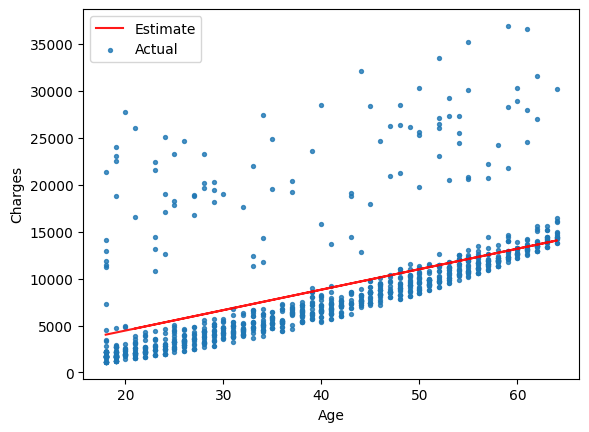

In [26]:
try_parameters(non_smoker_df,218,100)

In [27]:
rmse(targets,non_smoker_df.age,218,100)

4720.481900391483

###Висновок завдання 6###
Найменше значення втрат, яке вдалось досягнути 4720 долари.
Стратегія для перебору :
1) Спробувати w>b
2) w=b
3) w<b
4) Або взяти найменше віку і його medical charges та пропорційно подивитись як вони співвідносяться.
Зробити те саме для максимального значення віку, і коли в нас є дві точки можна провести лінію.